# Extracción de datos tratados


In [21]:
import pandas as pd

In [22]:
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Alura/Fase 3/Challenge 3/Data_limpia_TelecomX.json')

In [23]:
df.sample(5)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1948,0,0,0,0,35,1,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,1,Electronic check,89.20,3251.30,2.973333
5813,0,0,0,0,31,1,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,0,Bank transfer (automatic),99.45,3109.90,3.315000
5382,0,0,0,0,6,0,No phone service,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,0,Credit card (automatic),50.95,307.60,1.698333
6643,1,1,1,0,7,1,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,1,Electronic check,89.50,676.70,2.983333
844,0,1,0,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,74.45,294.45,2.481667


# **🛠️ Preparación de los Datos**

## Endocoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [24]:
df_encoded = df.copy()

for col in df_encoded.columns:
  if df_encoded[col].dtype == 'object' or df_encoded[col].dtype == 'bool':
    df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col, drop_first=True)


display(df_encoded.sample(5))



,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2532,0,0,1,0,68,1,0,70.95,4741.45,2.365000,...,False,False,False,False,True,False,True,False,False,False
6376,0,0,0,0,68,0,0,44.95,3085.35,1.498333,...,True,False,False,False,True,False,False,False,True,False
1664,0,0,1,0,46,1,0,70.60,3231.05,2.353333,...,True,False,False,False,True,True,False,False,False,True
5816,1,0,1,1,3,1,0,44.30,134.50,1.476667,...,False,False,False,False,False,False,False,False,False,True
5639,0,0,0,0,1,1,0,20.00,20.00,0.666667,...,False,True,False,True,False,False,False,False,False,True


## Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

Conteo de clientes por clase:
Churn
0    5163
1    1869
Name: count, dtype: int64


Proporción de clientes por clase (%):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


Visualización del desbalance de clases:


/tmp/ipython-input-244235934.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


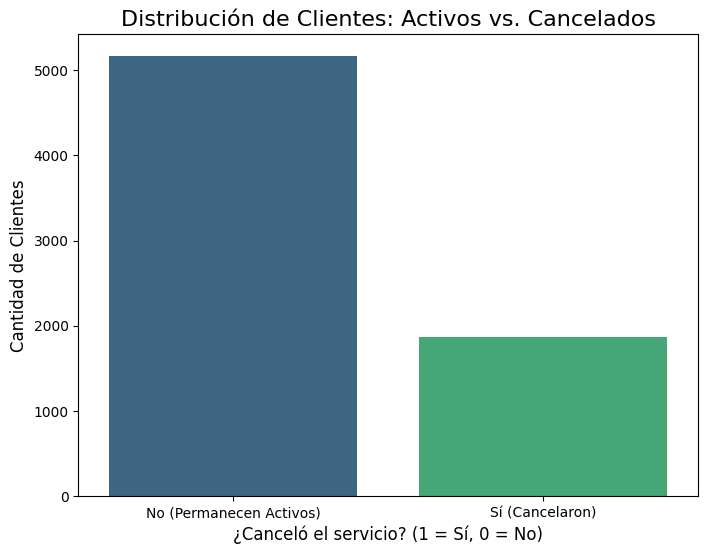

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt



churn_counts = df['Churn'].value_counts()
print("Conteo de clientes por clase:")
print(churn_counts)
print("\n" + "="*40 + "\n") # Separador


churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("Proporción de clientes por clase (%):")
print(churn_percentage)
print("\n" + "="*40 + "\n") # Separador



print("Visualización del desbalance de clases:")
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')


plt.title('Distribución de Clientes: Activos vs. Cancelados', fontsize=16)
plt.xlabel('¿Canceló el servicio? (1 = Sí, 0 = No)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks([0, 1], ['No (Permanecen Activos)', 'Sí (Cancelaron)']) # Etiquetas más claras


plt.show()

## Balanceo de Clases (opcional)
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [26]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype == 'bool':
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col, drop_first=True)

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Distribución de clases original: {Counter(y)}")
print("-" * 50)


print("Aplicando SMOTE (Oversampling)...")

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

print(f"Nueva distribución de clases con SMOTE: {Counter(y_smote)}")
print(f"Tamaño del dataset original: {X.shape[0]} muestras")
print(f"Tamaño del nuevo dataset con SMOTE: {X_smote.shape[0]} muestras")
print("-" * 50)


print("Aplicando Random Under-sampling...")

rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = rus.fit_resample(X, y)

print(f"Nueva distribución de clases con Random Under-sampling: {Counter(y_rus)}")
print(f"Tamaño del dataset original: {X.shape[0]} muestras")
print(f"Tamaño del nuevo dataset con Under-sampling: {X_rus.shape[0]} muestras")
print("-" * 50)

Distribución de clases original: Counter({0: 5163, 1: 1869})
--------------------------------------------------
Aplicando SMOTE (Oversampling)...
Nueva distribución de clases con SMOTE: Counter({0: 5163, 1: 5163})
Tamaño del dataset original: 7032 muestras
Tamaño del nuevo dataset con SMOTE: 10326 muestras
--------------------------------------------------
Aplicando Random Under-sampling...
Nueva distribución de clases con Random Under-sampling: Counter({0: 1869, 1: 1869})
Tamaño del dataset original: 7032 muestras
Tamaño del nuevo dataset con Under-sampling: 3738 muestras
--------------------------------------------------


## Normalización o Estandarización (si es necesario)
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_smote,
    y_smote,
    test_size=0.2,
    random_state=42,
    stratify=y_smote  # 'stratify' asegura que la proporción de clases sea igual en ambos conjuntos
)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print("-" * 50)



print("Aplicando StandardScaler...")

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


print("Verificación de la estandarización en el conjunto de entrenamiento (primeras 5 filas):")
display(X_train_scaled.head())

print("\nEstadísticas del conjunto de entrenamiento escalado (media y desviación estándar):")
display(X_train_scaled.describe().loc[['mean', 'std']].round(2))

Forma de X_train: (8260, 30)
Forma de X_test: (2066, 30)
--------------------------------------------------
Aplicando StandardScaler...
Verificación de la estandarización en el conjunto de entrenamiento (primeras 5 filas):


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.397694,-0.775898,-0.528611,-0.737525,0.336686,0.815673,-0.473755,-0.677137,-0.473755,-0.336686,...,-0.638463,-0.448447,-0.897917,-0.448447,-0.901000,-0.488243,-0.463942,1.893764,-0.961049,-0.560758
1,-0.397694,-0.775898,-0.528611,-1.029358,0.336686,-1.225981,0.133725,-0.842298,0.133725,-0.336686,...,-0.638463,-0.448447,-0.897917,-0.448447,-0.901000,-0.488243,-0.463942,-0.528049,1.040530,1.783301
2,-0.397694,-0.775898,-0.528611,-1.112738,0.336686,-1.225981,-1.699539,-0.927555,-1.699539,-0.336686,...,-0.638463,2.229916,-0.897917,2.229916,-0.901000,-0.488243,-0.463942,1.893764,-0.961049,-0.560758
3,-0.397694,1.288830,-0.528611,0.888398,0.336686,-1.225981,0.565723,0.915587,0.565723,-0.336686,...,1.566262,-0.448447,1.113689,-0.448447,1.109878,2.048162,-0.463942,-0.528049,1.040530,-0.560758
4,-0.397694,-0.775898,-0.528611,-0.612454,0.336686,0.815673,0.454288,-0.501904,0.454288,-0.336686,...,-0.638463,-0.448447,-0.897917,-0.448447,-0.901000,-0.488243,-0.463942,-0.528049,1.040530,-0.560758



Estadísticas del conjunto de entrenamiento escalado (media y desviación estándar):


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 🎯 Correlación y Selección de Variables

/tmp/ipython-input-1297014916.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='coolwarm')


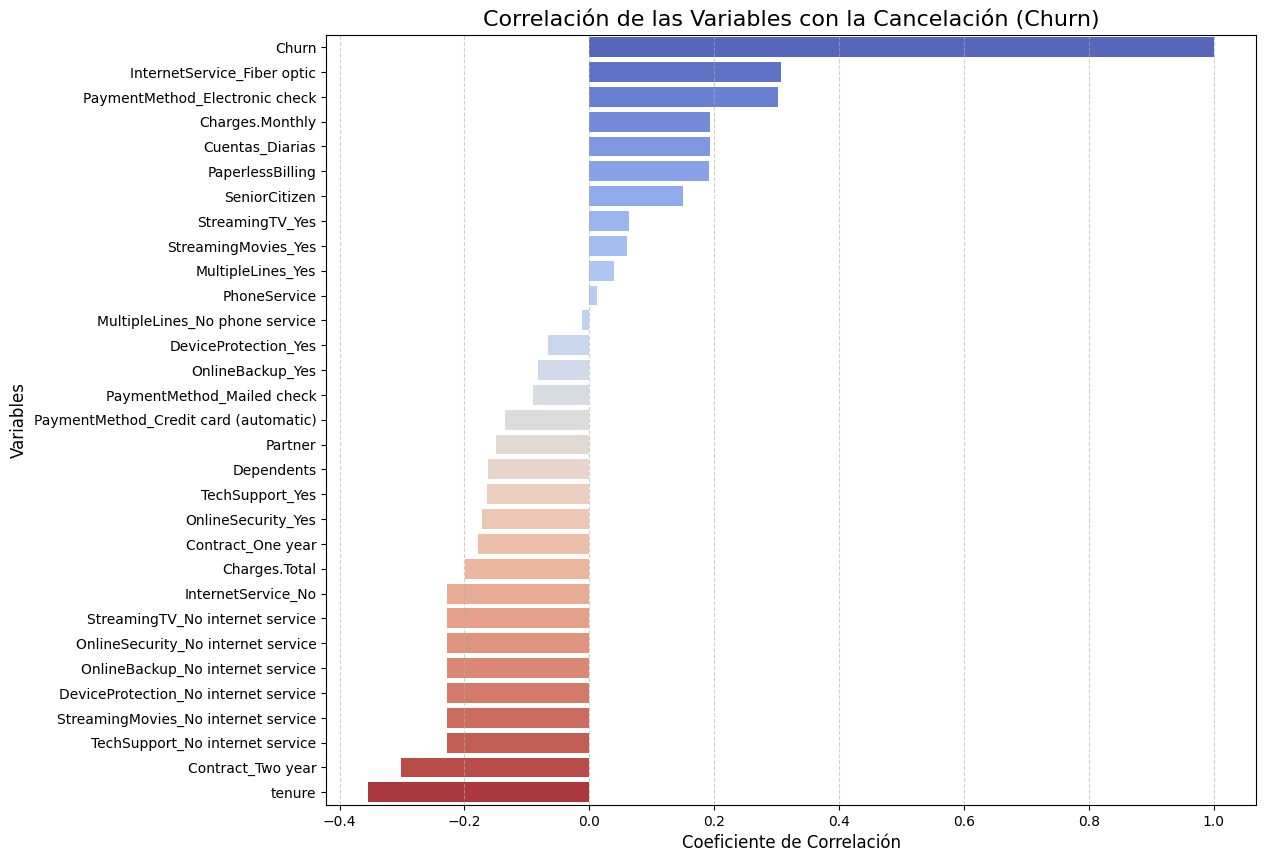

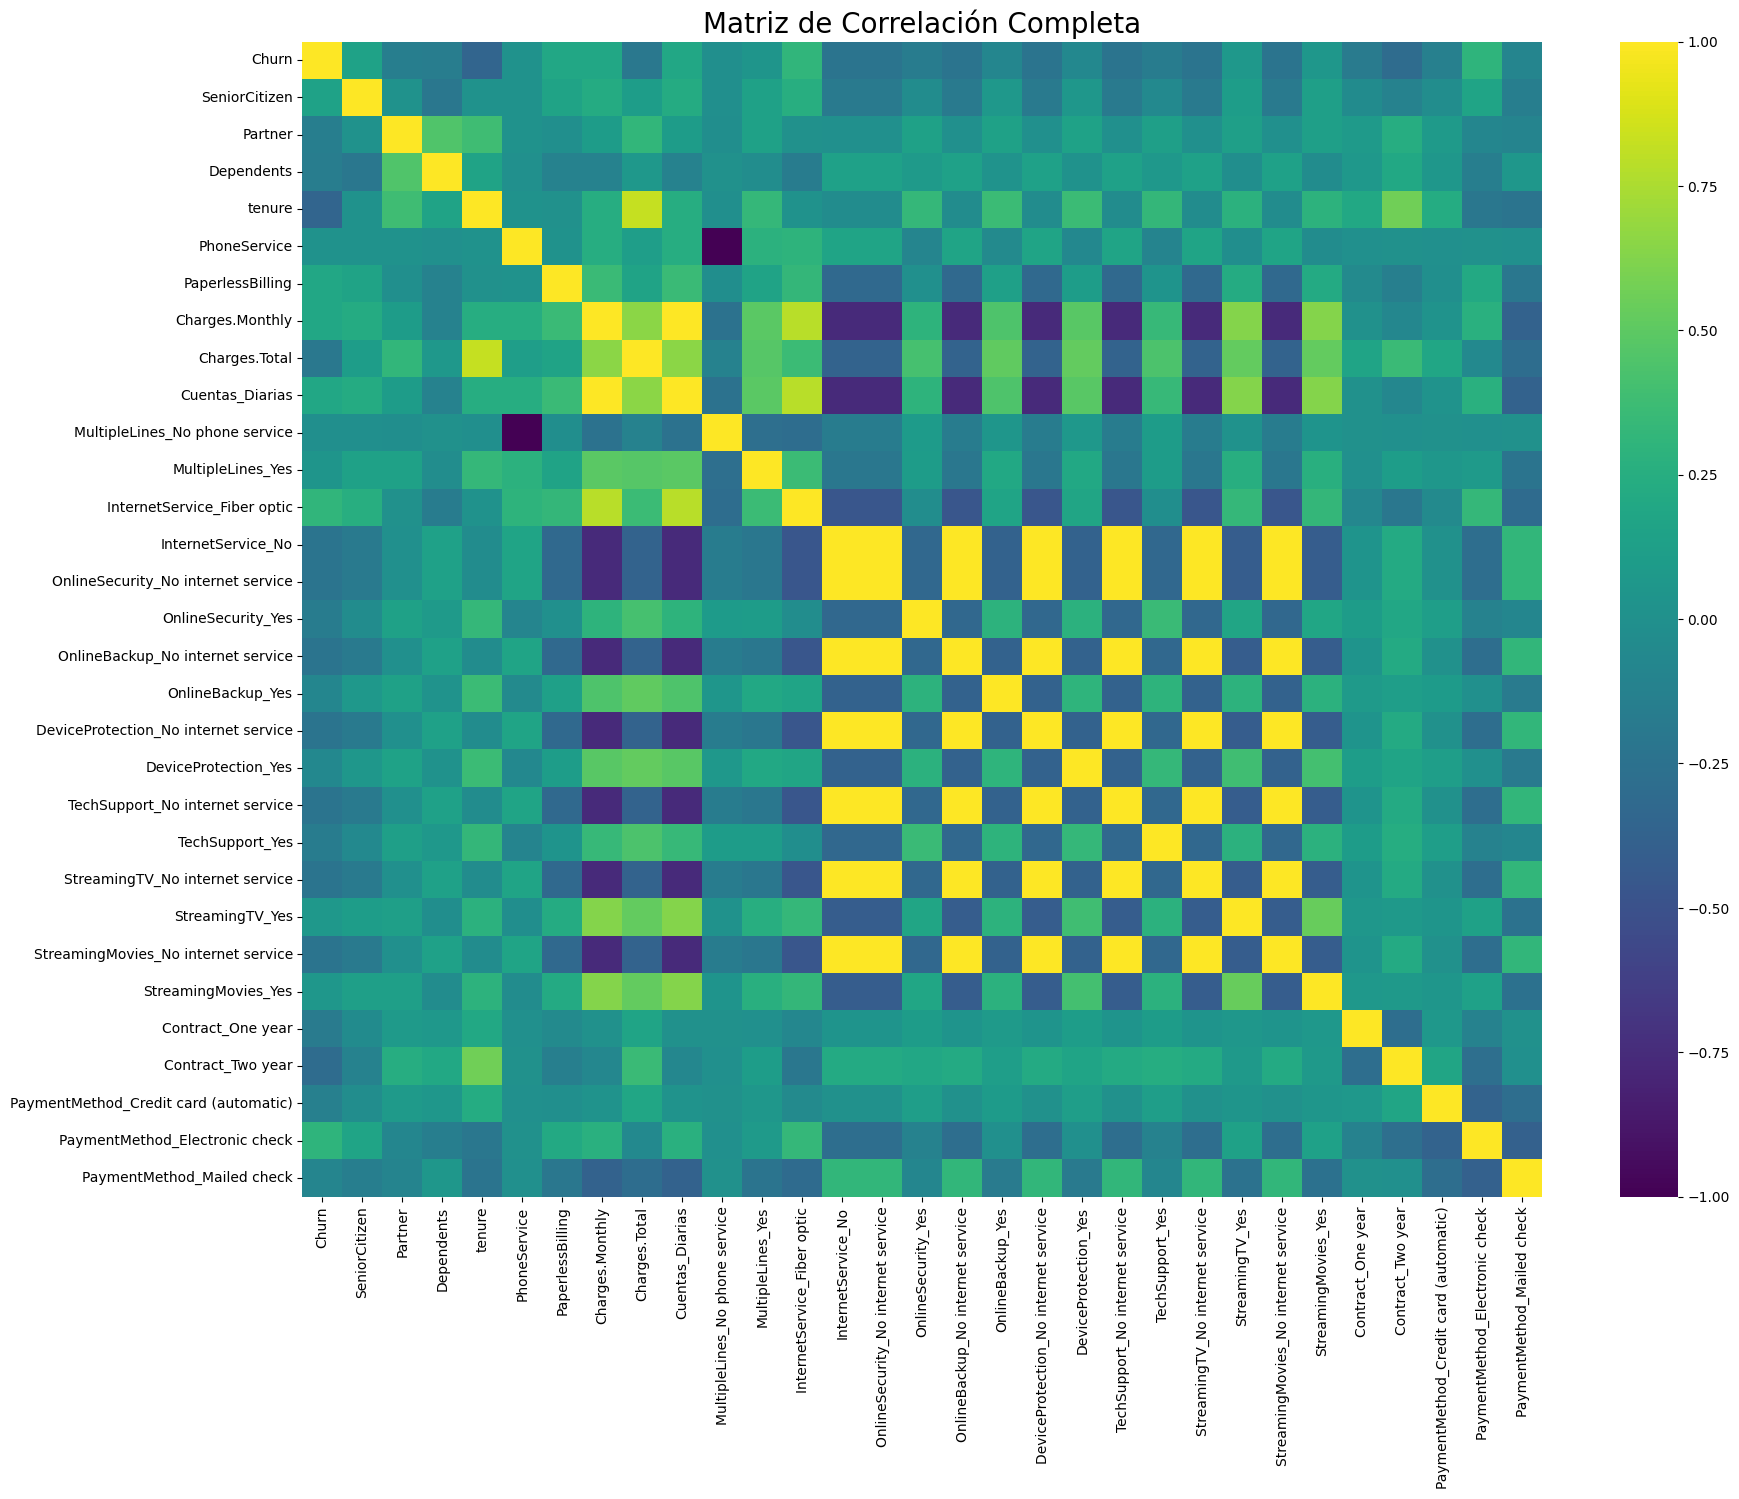

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].dtype == 'bool':
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col, drop_first=True)


corr_churn = df_encoded.corr()['Churn'].sort_values(ascending=False)

plt.figure(figsize=(12, 10))

sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='coolwarm')

plt.title('Correlación de las Variables con la Cancelación (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 15))


sns.heatmap(correlation_matrix, cmap='viridis', annot=False) # annot=False para no mostrar los números

plt.title('Matriz de Correlación Completa', fontsize=20)
plt.show()

## Análisis de Correlación

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [29]:
df

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,1,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,0,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,0,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


Columnas disponibles en el DataFrame:
Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


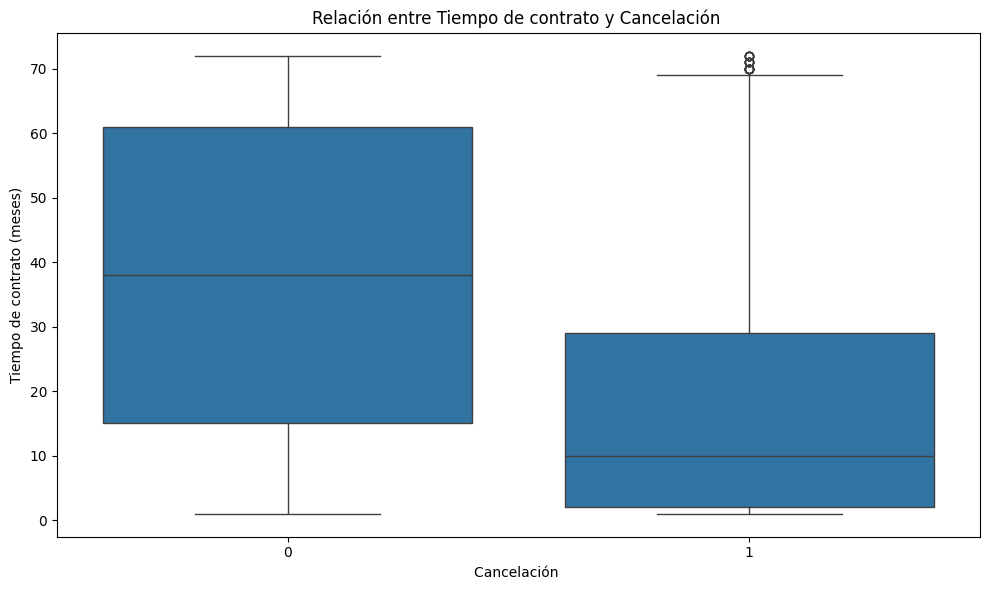

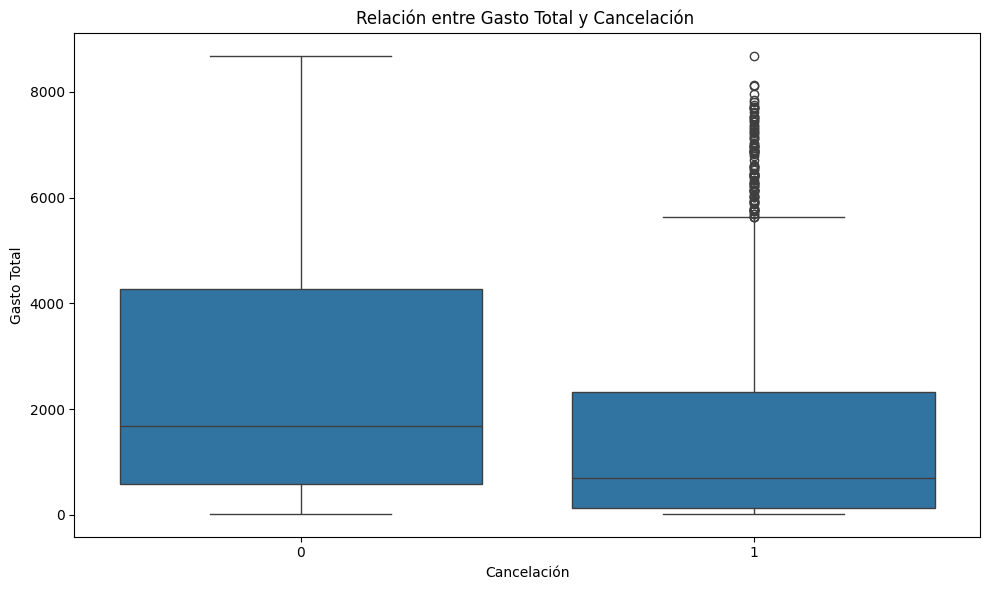

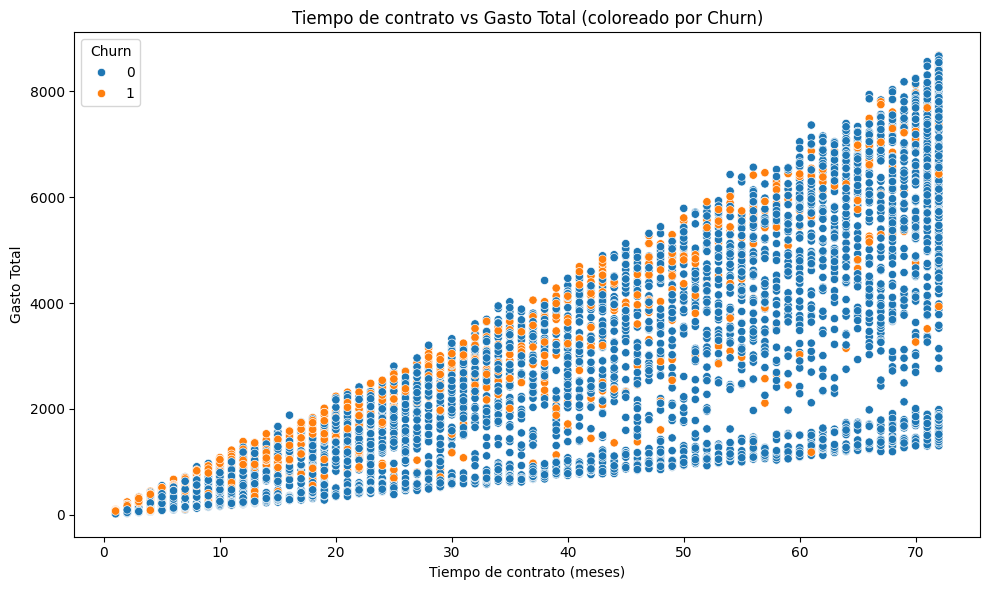

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns



print("Columnas disponibles en el DataFrame:")
print(df.columns)

df.rename(columns=lambda x: x.strip().replace(" ", ""), inplace=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Relación entre Tiempo de contrato y Cancelación ")
plt.xlabel("Cancelación ")
plt.ylabel("Tiempo de contrato (meses)")
plt.tight_layout()


plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="Charges.Total", data=df)
plt.title("Relación entre Gasto Total y Cancelación ")
plt.xlabel("Cancelación")
plt.ylabel("Gasto Total")
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="tenure", y="Charges.Total", hue="Churn", data=df)
plt.title("Tiempo de contrato vs Gasto Total (coloreado por Churn)")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto Total")
plt.tight_layout()

plt.show()




# 🤖 Modelado Predictivo

## Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [31]:
from sklearn.model_selection import train_test_split


# 80% entrenamiento, 20% prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv("telecomx_train.csv", index=False)
test_df.to_csv("telecomx_test.csv", index=False)

print("Conjunto de datos dividido exitosamente en entrenamiento (80%) y prueba (20%).")



Conjunto de datos dividido exitosamente en entrenamiento (80%) y prueba (20%).


## Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = df.dropna()

df['Churn'] = df['Churn'].astype(int)

X = df.drop(columns=['Churn'])
y = df['Churn']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
print("Regresión Logística (con normalización):")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest (sin normalización):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))




Regresión Logística (con normalización):
Accuracy: 0.7960199004975125
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407


Random Forest (sin normalización):
Accuracy: 0.7810945273631841
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



La normalización es crucial para modelos como Regresión Logística o KNN porque estos algoritmos dependen de cálculos de distancia o de optimización de parámetros.
Si las variables tienen escalas muy diferentes (por ejemplo, ingresos en miles y edad en decenas), las variables con mayor magnitud dominarán el proceso de entrenamiento.
La normalización (como la estandarización con StandardScaler) transforma todas las variables para que tengan media 0 y desviación estándar 1, asegurando que cada característica contribuya equitativamente al modelo.
Por otro lado, modelos como Random Forest no requieren normalización porque se basan en árboles de decisión que dividen los datos según umbrales, sin importar la escala de las variables.

## Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.


Evaluacion para Logistic Regression:
Accuracy: 0.7782515991471215
Precision: 0.6099290780141844
Recall: 0.45989304812834225
F1 Score: 0.524390243902439
Confusion Matrix:
 [[923 110]
 [202 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407


Evaluacion para Random Forest:
Accuracy: 0.7569296375266524
Precision: 0.5506329113924051
Recall: 0.46524064171123
F1 Score: 0.5043478260869565
Confusion Matrix:
 [[891 142]
 [200 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.55      0.47      0.50       374

    accuracy                           0.76      1407
   macro avg       0.68  

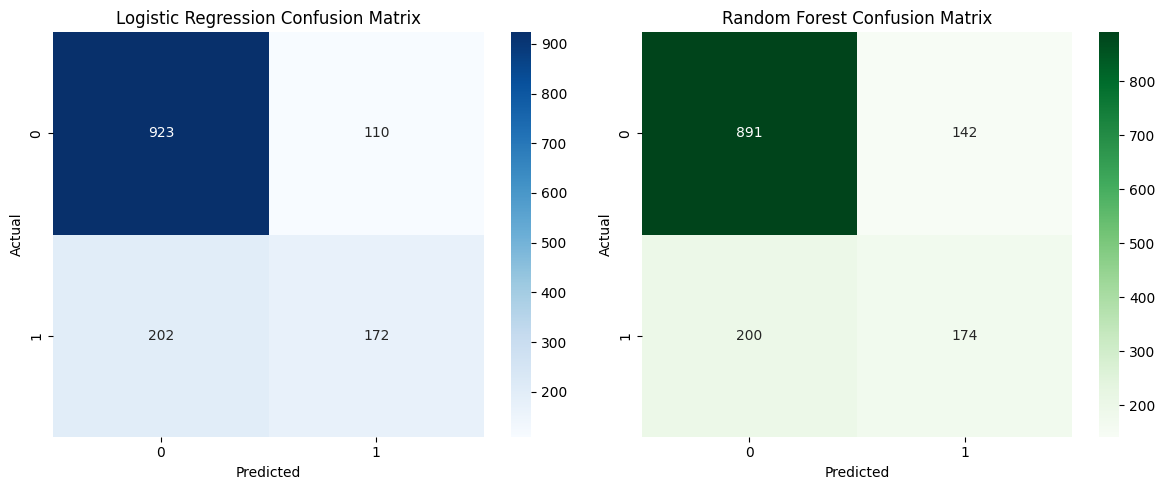

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


if 'Churn' not in df.columns:
    raise ValueError("Column 'Churn' not found in dataset.")

df_clean = df.dropna()

numeric_features = df_clean.select_dtypes(include=['int64', 'float64']).drop(columns=['Churn'])
target = df_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Modelo 2
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluacion
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluacion para {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.savefig("confusion_matrices.png")
plt.show()




# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

Se ha generado el gráfico 'variable_importance_models.png' con el análisis de importancia de variables para los modelos.


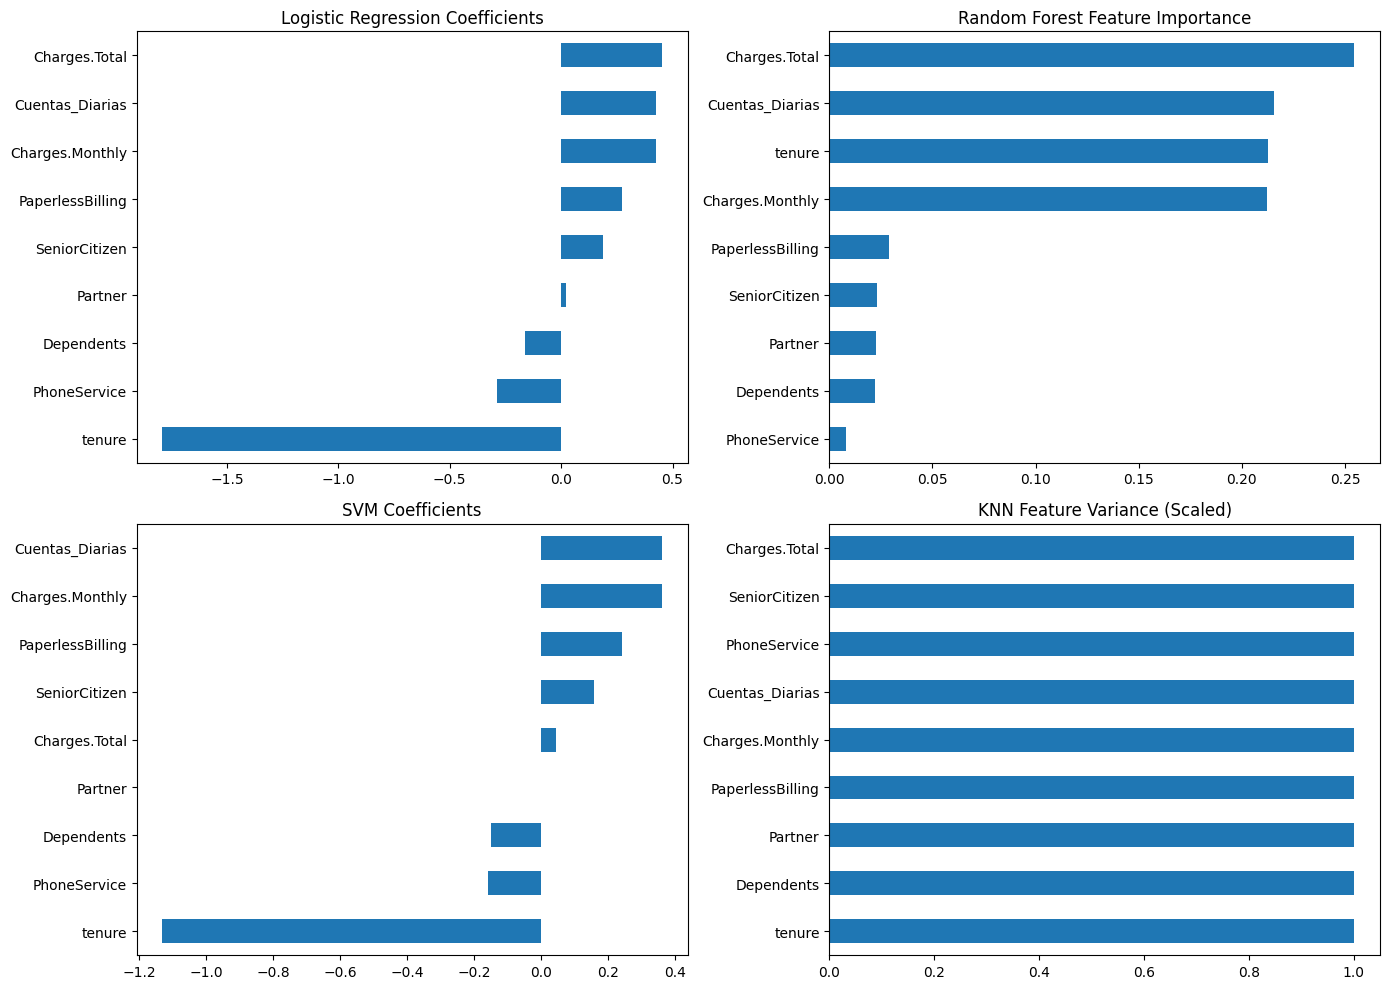

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



df_clean = df.dropna()

features = df_clean.select_dtypes(include=[np.number]).drop(columns=["Churn"])
target = df_clean["Churn"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

log_coefficients = pd.Series(log_model.coef_[0], index=X_train.columns)
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
svm_coefficients = pd.Series(svm_model.coef_[0], index=X_train.columns)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
log_coefficients.sort_values().plot(kind='barh', title='Logistic Regression Coefficients')

plt.subplot(2, 2, 2)
rf_importance.sort_values().plot(kind='barh', title='Random Forest Feature Importance')

plt.subplot(2, 2, 3)
svm_coefficients.sort_values().plot(kind='barh', title='SVM Coefficients')

plt.subplot(2, 2, 4)

feature_variance = pd.Series(np.var(X_train_scaled, axis=0), index=X_train.columns)
feature_variance.sort_values().plot(kind='barh', title='KNN Feature Variance (Scaled)')

plt.tight_layout()
plt.savefig("variable_importance_models.png")
print("Se ha generado el gráfico 'variable_importance_models.png' con el análisis de importancia de variables para los modelos.")



# **Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

## ✅ Factores más influyentes según los modelos
1. Regresión Logística
tenure (antigüedad del cliente) : Mayor peso negativo: clientes con menor tiempo son más propensos a cancelar.
Charges.Total (cargos totales) : Influye en la probabilidad de cancelación.
Cuentas_Diarias y Charges.Monthly (cargos mensuales) : Impactan en la decisión.
PhoneService : Relacionado con la permanencia.

2. Random Forest
Charges.Total (25.4%)
Cuentas_Diarias (21.5%)
tenure (21.2%)
Charges.Monthly (21.2%)
PaperlessBilling (facturación electrónica) : Menor, pero relevante.

3. SVM
tenure (1.13)
Cuentas_Diarias y Charges.Monthly (0.36)
PaperlessBilling (0.24)
SeniorCitizen (0.15)

4. KNN (basado en varianza)
SeniorCitizen, PhoneService, Charges.Total, Cuentas_Diarias, Partner: Variables con mayor dispersión, influyen en la proximidad entre clientes.

## 🔍 Conclusiones Clave


* Antigüedad (tenure) es el factor más crítico: clientes nuevos son más propensos a cancelar.

* Cargos mensuales y totales: altos costos incrementan la probabilidad de churn.

* Uso del servicio (Cuentas_Diarias): clientes con baja interacción tienden a cancelar.

* Facturación electrónica y características demográficas (SeniorCitizen, Partner) también influyen.

## 🛠️ Estrategias de Retención

* Programas de fidelización para clientes nuevos: descuentos en los primeros meses.
* Planes personalizados: reducir cargos mensuales para clientes con alto riesgo.
* Mejorar la experiencia digital: optimizar facturación electrónica y soporte online.
* Segmentación proactiva: identificar clientes con baja interacción y ofrecer incentivos.
* Atención especial a adultos mayores: soporte dedicado y planes adaptados.